Sources:

https://www.kaggle.com/sohommajumder21/7-models-with-params-tuning-beginner-friendly with adjustment to display only Decision
Tree

https://mljar.com/blog/visualize-decision-tree/ for decision tree visualization

##Load and Preparing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("drive/MyDrive/dataset/water_potability.csv")
df.head() #print 5 data teratas untuk pengecekan apakah dataset telah diload ke code

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#shape of the data
df.shape

(3276, 10)

There are 3276 rows and 10 columns

In [4]:
#Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
#Fill missing values
#data kosong diisi agar data yang diproses model lebih banyak. Dengan data yang lebih banyak, model dapat menghasilkan akurasi yang lebih tinggi
zero  = df[df['Potability']==0]  #class air tidak dapat diminum
one = df[df['Potability']==1]    #class air bisa diminum
#mengisi atribut class 0
zero_values = {"ph": np.random.uniform(low=3.5,high=6.0), "Sulfate": np.random.uniform(low=500.0,high=850.0), "Trihalomethanes": np.random.uniform(low=80.2,high=100.1)}
zero.fillna(value=zero_values,inplace=True)
#mengisi atribut class 1
one_values = {"ph": np.random.uniform(low=6.5,high=8.5), "Sulfate": np.random.uniform(low=3.0,high=30.1), "Trihalomethanes": np.random.uniform(low=0.0,high=80.1)}
one.fillna(value=one_values,inplace=True)

<ipython-input-5-aad9df82bded>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero.fillna(value=zero_values,inplace=True)
<ipython-input-5-aad9df82bded>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one.fillna(value=one_values,inplace=True)


In [6]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<Axes: ylabel='Potability'>

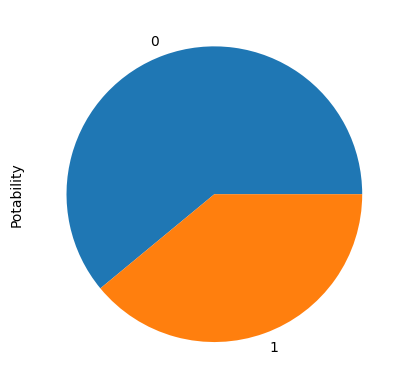

In [7]:
#Plots
import matplotlib.pyplot as plt
import seaborn as sns

df.Potability.value_counts().plot(kind ='pie')

Dataset masih belum balance, dimana hasil klasifikasi 0 > 1 (1998>1278), maka dataset akan dibuat balance dengan melakukan upsampling.

In [8]:
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 1998, random_state=42)
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle #untuk shuffle dataset
df = shuffle(df) # shuffling so that there is particular sequence

In [9]:
df.Potability.value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

<Axes: ylabel='Potability'>

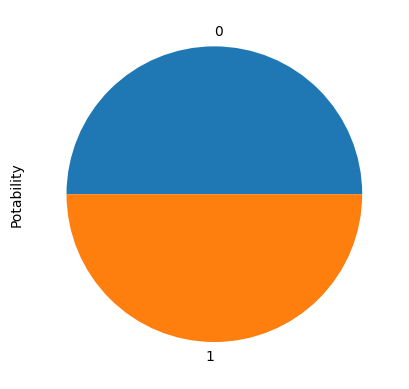

In [10]:
df.Potability.value_counts().plot(kind ='pie')

Sekarang, dataset sudah balance.

In [11]:
#df.corr().abs()['Potability'].sort_values(ascending = False)

##Preprocess Dataset

In [12]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42) #data yang di-train 80%, 20% data testing

###Load Machine Learning Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

###Hyperparameter Tuning

In [16]:
dt = DecisionTreeClassifier()
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

In [17]:
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1}


###Training the model

In [42]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=36, min_samples_leaf=1,random_state=42) #max_depth dari tree diset 48 sudah paling konsisten akurasinya
#jangan lupa coba model ML lain

In [43]:
classifiers = [('Decision Tree', dt)]

In [44]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:

    # Fit clf to the training set
    classifier.fit(X_train, y_train)

    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} Accuracy : {:.2f}'.format(classifier_name, accuracy))

Decision Tree Accuracy : 0.89


Accuracy bekisar antara 85-88%

## Result in text

In [45]:
from sklearn.metrics import classification_report

y_pred_rf= dt.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       404
           1       0.86      0.92      0.89       396

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



### Tree in text format and in plot

In [22]:
#from sklearn import tree
#text_representation = tree.export_text(dt)
#print(text_representation)

In [23]:
# fig = plt.figure(figsize=(500,50))
# _ = tree.plot_tree(dt, feature_names=list(df.columns), filled=True, fontsize=6)
# plt.savefig('DecisionTree', dpi=100)